# First we import pandas to read the data set
## Then we define some constants that will be our column names later

In [1]:
import pandas as pd
TOKEN = 'token'
POS_TAG = 'pos_tag'
EZAFE_TAG = 'ezafe_tag'
NEXT_TOKEN_POS = 'next_token_pos'
PREV_TOKE_POS = 'prev_token_pos'
LAST_LETTER = 'last_letter'
TOKEN_LENGTH = 'token_length'
IS_VERB = 'is_verb'
HAS_AA_BAKOLAAH ='has_aa_baakolaah'
HAS_AA_BIKOLAAH = 'has_aa_bikolaah'
HAS_TARIN = 'has_tarin'
HAS_TAR = 'has_tar'
HAS_VAAV = 'has_vaav'
HAS_HE = 'has_he'

## Now we read the data. And it also has header
### Since we didn't set 'header=None' pd won't be recognized as a pd.DataFrame so we declare it as a pd.DataFrame(just for syntax highlighting and suggestions)
### Pay attention that there's an extra useless column(named 'Unnamed: 0') so we drop it
### Then we get a first preview of our raw data

In [2]:
df = pd.read_csv("./dataset/updated_bijankhan_corpus.csv")
df: pd.DataFrame

del df['Unnamed: 0']
df.head(20)

,token,pos_tag,ezafe_tag
0,!هنری!,SUBJ,0
1,#,DELM,0
2,مسعود,N_SING_PR,1
3,شجاعی,N_SING_PR,1
4,طباطبایی,N_SING_PR,0
5,#,DELM,0
6,دنیای,N_SING_COM,1
7,آدولف,N_SING_PR,0
8,بورن,N_SING_PR,0
9,دنیای,N_SING_COM,1


## As you can see we have sentences coming after together having their words in each row. And there is a delimiter between each sentence as well.

## Now lets take a look at each column details

In [3]:
df[TOKEN].value_counts()

و            120557
،             94691
در            85716
.             84003
به            68966
              ...  
پونتوس            1
آترخان‌اف         1
المشهور           1
آزگار             1
متقبل             1
Name: token, Length: 76799, dtype: int64

In [4]:
df[POS_TAG].value_counts()

N_SING_COM          636812
P_GENR              281880
DELM                256489
ADJ_SIM             220353
N_PL_COM            139962
                     ...  
V_PA_SIM_POS_3_1         1
V_PA_NAR_PCAU_4          1
302317824                1
N_SING_PR_PAFF_1         1
V_SUB_POS_2_3            1
Name: pos_tag, Length: 482, dtype: int64

### Note that we hav 482 defferent types of pos_tags so probably this can be our best feature!

# Here we define some functions to analyze last letters of words in 'token' columns

In [5]:
def hasSuffixABaKolaah(s: str) -> bool:
    return s.endswith('آ')
def hasSuffixABiKolaah(s: str) -> bool:
    return s.endswith('ا')
def hasSuffixTarin(s: str) -> bool:
    return s.endswith('ترین')
def hasSuffixTar(s: str) -> bool:
    return s.endswith('تر')
def hasSuffixVaav(s: str) -> bool:
    return s.endswith('و')
def hasSuffixHe(s: str) -> bool:
    return s.endswith('ه')


## For each special suffix we add a new boolean column where it will be True IFF the token in that row has the corresponding suffix
### Let's look at the data again 

In [6]:
df[HAS_AA_BAKOLAAH] = df[TOKEN].apply(hasSuffixABaKolaah)
df[HAS_AA_BIKOLAAH] = df[TOKEN].apply(hasSuffixABiKolaah)
df[HAS_TARIN] = df[TOKEN].apply(hasSuffixTarin)
df[HAS_TAR] = df[TOKEN].apply(hasSuffixTar)
df[HAS_VAAV] = df[TOKEN].apply(hasSuffixVaav)
df[HAS_HE] = df[TOKEN].apply(hasSuffixHe)
df

,token,pos_tag,ezafe_tag,has_aa_baakolaah,has_aa_bikolaah,has_tarin,has_tar,has_vaav,has_he
0,!هنری!,SUBJ,0,False,False,False,False,False,False
1,#,DELM,0,False,False,False,False,False,False
2,مسعود,N_SING_PR,1,False,False,False,False,False,False
3,شجاعی,N_SING_PR,1,False,False,False,False,False,False
4,طباطبایی,N_SING_PR,0,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
2602531,مصنوعی,ADJ_SIM,0,False,False,False,False,False,False
2602532,ایجاد,N_SING_COM,0,False,False,False,False,False,False
2602533,شده,ADJ_INO,0,False,False,False,False,False,True
2602534,است,V_PRE_SIM,0,False,False,False,False,False,False


# Here we're making sure that some rules are respected

### first check how many of the rows in which the token has آ doesn't have EZAFE

0    65
1     5
Name: ezafe_tag, dtype: int64

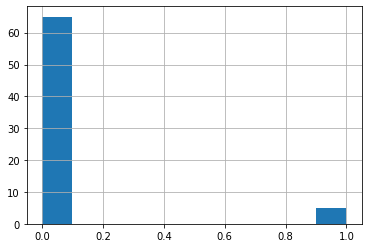

In [7]:
df[df[HAS_AA_BAKOLAAH]][EZAFE_TAG].hist()
df[df[HAS_AA_BAKOLAAH]][EZAFE_TAG].value_counts()

### Suprisingly there is 5! let's see what cases we have

In [8]:
df[(df[HAS_AA_BAKOLAAH]) & df[EZAFE_TAG]].head(20)

,token,pos_tag,ezafe_tag,has_aa_baakolaah,has_aa_bikolaah,has_tarin,has_tar,has_vaav,has_he
784073,کونگ‌فوتوآ,N_SING_COM,1,True,False,False,False,False,False
1379592,آ,N_SING_NPR,1,True,False,False,False,False,False
1797232,وه‌آ,N_SING_PR,1,True,False,False,False,False,False
2517467,دی‌ان‌آ,N_SING_NPR,1,True,False,False,False,False,False
2573905,دی‌ان‌آ,N_SING_NPR,1,True,False,False,False,False,False


#### although 5 is not a big number to affect the model. But it would be better if they had 'ی' at the end

### Let's look at 'ا':
#### here we have more! 378 cases!

0    143717
1       378
Name: ezafe_tag, dtype: int64

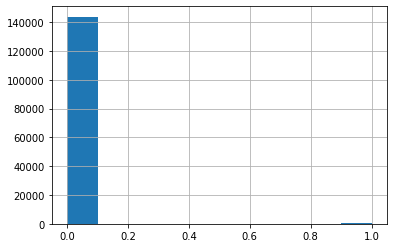

In [9]:
df[(df[HAS_AA_BIKOLAAH])][EZAFE_TAG].hist()
df[(df[HAS_AA_BIKOLAAH])][EZAFE_TAG].value_counts()

### Let's look at the exact cases

In [10]:
df[(df[HAS_AA_BIKOLAAH]) & df[EZAFE_TAG]].head(20)

,token,pos_tag,ezafe_tag,has_aa_baakolaah,has_aa_bikolaah,has_tarin,has_tar,has_vaav,has_he
703,قبلا,ADV_TIM,1,False,True,False,False,False,False
5394,تنها,ADV_NI_NQ_SIM,1,False,True,False,False,False,False
15798,گزها,N_PL_COM,1,False,True,False,False,False,False
43871,مبدا,N_SING_COM,1,False,True,False,False,False,False
83633,منشا,N_SING_COM,1,False,True,False,False,False,False
85493,سریال‌ها,N_PL_COM,1,False,True,False,False,False,False
88756,جزا,N_SING_COM,1,False,True,False,False,False,False
101447,جزا,N_SING_COM,1,False,True,False,False,False,False
103866,پیچ‌و‌خمها,N_PL_COM,1,False,True,False,False,False,False
104944,خلا,N_SING_COM,1,False,True,False,False,False,False


#### Most of these must have a 'ی' at the end!

### Now ترین and تر can get EZAFE sometimes. it's not wrong so we just check the numbers and pass

0    3916
1     207
Name: ezafe_tag, dtype: int64

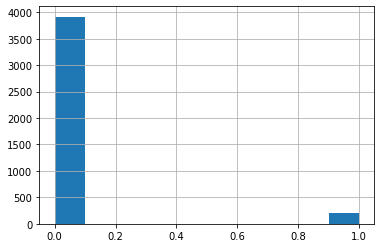

In [11]:
df[(df[HAS_TARIN])][EZAFE_TAG].hist()
df[(df[HAS_TARIN])][EZAFE_TAG].value_counts()

0    8978
1    1712
Name: ezafe_tag, dtype: int64

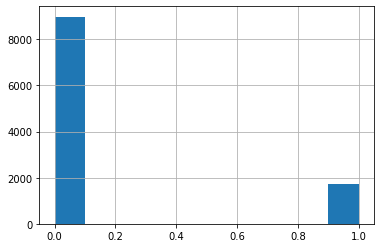

In [12]:
df[(df[HAS_TAR])][EZAFE_TAG].hist()
df[(df[HAS_TAR])][EZAFE_TAG].value_counts()

In [13]:
del df[HAS_TARIN]
del df[HAS_TAR]

### Now let's take a look at tokens having 'و' as their suffix. We have 140k of them and 1.8k has EZAFE! let's see them in details...

0    140824
1      1843
Name: ezafe_tag, dtype: int64

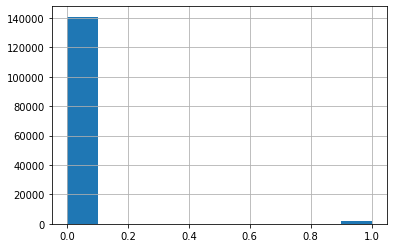

In [14]:
df[(df[HAS_VAAV])][EZAFE_TAG].hist()
df[(df[HAS_VAAV])][EZAFE_TAG].value_counts()

In [15]:
df[(df[HAS_VAAV]) & df[EZAFE_TAG]]

,token,pos_tag,ezafe_tag,has_aa_baakolaah,has_aa_bikolaah,has_vaav,has_he
182,قلمرو,N_SING_COM,1,False,False,True,False
1087,جو,N_SING_COM,1,False,False,True,False
1750,خودرو,N_SING_COM,1,False,False,True,False
2049,قلمرو,N_SING_COM,1,False,False,True,False
12610,نحو,N_SING_COM,1,False,False,True,False
...,...,...,...,...,...,...,...
2590428,عضو,N_SING_COM,1,False,False,True,False
2590471,عضو,N_SING_COM,1,False,False,True,False
2596704,عضو,N_SING_COM,1,False,False,True,False
2597851,عضو,N_SING_COM,1,False,False,True,False


#### These cases seem rational too and can't help us mush. because the sound 'v' as well(not just sound 'oo')

### Now let's the tokens with 'ا'. We have 254k of them and suprisingly theres 64215 of them getting EZAFE!!!

#### Let's look in details

0    254930
1     64215
Name: ezafe_tag, dtype: int64

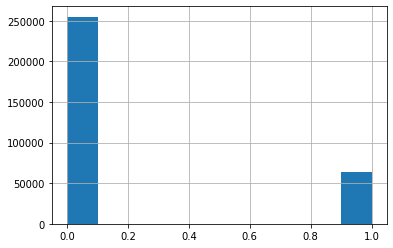

In [16]:
df[(df[HAS_HE])][EZAFE_TAG].hist()
df[(df[HAS_HE])][EZAFE_TAG].value_counts()

In [17]:
df[(df[HAS_HE]) & df[EZAFE_TAG]]

,token,pos_tag,ezafe_tag,has_aa_baakolaah,has_aa_bikolaah,has_vaav,has_he
137,رشته,N_SING_COM,1,False,False,False,True
141,دانشگاه,N_SING_LOC,1,False,False,False,True
207,شیوه,N_SING_COM,1,False,False,False,True
255,برنامه,N_SING_COM,1,False,False,False,True
276,نشان‌دهنده,ADJ_SIM,1,False,False,False,True
...,...,...,...,...,...,...,...
2602332,روزنامه,N_SING_COM,1,False,False,False,True
2602343,درباره,P_GENR,1,False,False,False,True
2602348,میوه,N_SING_COM,1,False,False,False,True
2602469,مقایسه,N_SING_COM,1,False,False,False,True


#### This is too much! we need to fix them. we need to add a letter 'ی' to these tokens

### We need to append a letter 'ی' to those tokens having some special suffix(last letter) AND EZAFE! we have 2 conditions. consider each condition 1. we construct a new column each row is a number between 0 and 2. showing how many of those conditions it holds.(2s are our target. one for having special last letter and one for having EZAFE)

### In here we difine two functions. one just determines if the word has some of those special suffixes
### The other replaces '2'(the row having both conditions) with 'ی' and "empty string" for others.

In [18]:
def hasSpecialLastLetter(s: str) -> str:
    return (s.endswith('ه') and not s.endswith('اه')) or s.endswith('ا') or s.endswith('آ')
    
def replaceYeWithTwo(num: int) -> str:
    return '‌ی' if num==2 else ''

#### Now here we build and and concat it to the end of the 'token' columns

<AxesSubplot:>

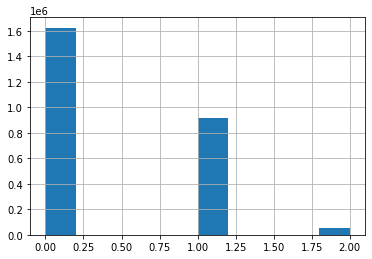

In [19]:
df['temp'] = df[TOKEN].apply(hasSpecialLastLetter)

'''
    the temp column has 1 wherever the corresponding has special last letter
'''

df['temp'] = df['temp'] + df[EZAFE_TAG]
'''
This operations apply an logical AND between those 2 conditions. we will have '2' IFF the token has EZAFE AND special last letter
Actually let's take a look at it
'''

df['temp'].value_counts()
df['temp'].hist()


### Just as expected! 57074 BAD cases(tokens) that need a letter 'ی' at their end

In [20]:
df[TOKEN] = df[TOKEN] + df['temp'].apply(replaceYeWithTwo)
df[df['temp']==2]

,token,pos_tag,ezafe_tag,has_aa_baakolaah,has_aa_bikolaah,has_vaav,has_he,temp
137,رشته‌ی,N_SING_COM,1,False,False,False,True,2
207,شیوه‌ی,N_SING_COM,1,False,False,False,True,2
255,برنامه‌ی,N_SING_COM,1,False,False,False,True,2
276,نشان‌دهنده‌ی,ADJ_SIM,1,False,False,False,True,2
298,دستمایه‌ی,N_SING_COM,1,False,False,False,True,2
...,...,...,...,...,...,...,...,...
2602332,روزنامه‌ی,N_SING_COM,1,False,False,False,True,2
2602343,درباره‌ی,P_GENR,1,False,False,False,True,2
2602348,میوه‌ی,N_SING_COM,1,False,False,False,True,2
2602469,مقایسه‌ی,N_SING_COM,1,False,False,False,True,2


### As you can see now it's correct!

## Now for Another pre processing we need to insert a new column 'last_letter' to do this we need to define the following function:

In [21]:
special_suffixes = {
                    # 'تر',
                    # 'ترین',
                    'ا',
                    'آ',
                    # 'و',
                    'ه',
                }
def classifyLastLetter(s: str) -> int:
    if s[-1] in special_suffixes:
        return 'special'
    if s[-1].isalpha():
        return s[-1]
    if s[-1].isnumeric():
        return 'numeric'
    else:
        return 'other'
    

### And create 2 new columns. suprisingly the length of the token will be helpful!

In [22]:
df[LAST_LETTER] = df[TOKEN].apply(classifyLastLetter)
df[TOKEN_LENGTH] = df[TOKEN].apply(lambda s: len(s))

0          6
1          1
2          5
3          5
4          8
          ..
2602531    6
2602532    5
2602533    3
2602534    3
2602535    1
Name: token_length, Length: 2602536, dtype: int64

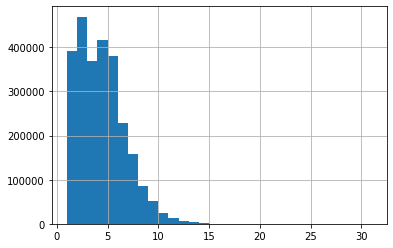

In [23]:
df[TOKEN_LENGTH].hist(bins=30)
df[TOKEN_LENGTH]

### we know that the verbs won't ever have EZAFE. so we create a boolean column for that as well.

<AxesSubplot:>

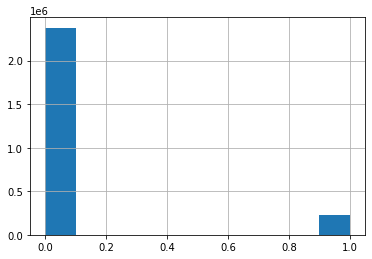

In [24]:
df[IS_VERB] = df[POS_TAG].apply(lambda s: str(s).startswith('V_')).astype(int)
df[IS_VERB].hist()

## Now since we can't work with string data we need to convert them to numeric data using a label encoder.

##### And a preview of our data frame

In [25]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df[POS_TAG] = label_encoder.fit_transform(df[POS_TAG])
df[LAST_LETTER] = label_encoder.fit_transform(df[LAST_LETTER])
df[TOKEN] = label_encoder.fit_transform(df[TOKEN])


0          248
1           65
2          167
3          167
4          167
          ... 
2602531     23
2602532    121
2602533     18
2602534    423
2602535     65
Name: pos_tag, Length: 2602536, dtype: int64

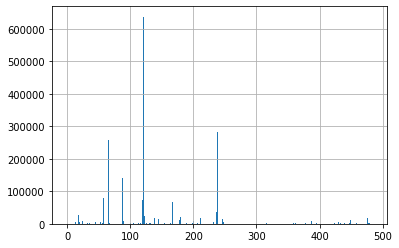

In [26]:
df[POS_TAG].hist(bins=len(df[POS_TAG].unique()))
df[POS_TAG]

0          41
1          41
2          61
3          85
4          85
           ..
2602531    85
2602532    61
2602533    45
2602534    56
2602535    41
Name: last_letter, Length: 2602536, dtype: int64

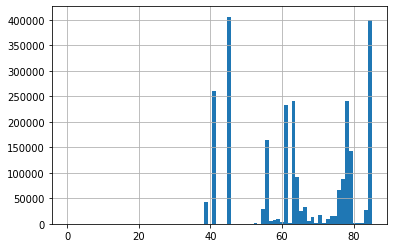

In [27]:
df[LAST_LETTER].hist(bins=80)
df[LAST_LETTER]

#### But an important thing is that the pos_tag of the next and [maybe] the previous token can be a greate help
#### so we make a shift to top and down to have them.
#### we also set the NaN values (generated by shifts) to zero

In [28]:
df[PREV_TOKE_POS] = df[POS_TAG].shift(periods=1)
df[NEXT_TOKEN_POS] = df[POS_TAG].shift(periods=-1)
df[NEXT_TOKEN_POS][len(df[NEXT_TOKEN_POS])-1] = 0
df[PREV_TOKE_POS][0] = 0
df

/tmp/ipykernel_3396/1393868010.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[NEXT_TOKEN_POS][len(df[NEXT_TOKEN_POS])-1] = 0
/tmp/ipykernel_3396/1393868010.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[PREV_TOKE_POS][0] = 0


,token,pos_tag,ezafe_tag,has_aa_baakolaah,has_aa_bikolaah,has_vaav,has_he,temp,last_letter,token_length,is_verb,prev_token_pos,next_token_pos
0,136,248,0,False,False,False,False,0,41,6,0,0.0,65.0
1,192,65,0,False,False,False,False,0,41,1,0,248.0,167.0
2,54551,167,1,False,False,False,False,1,61,5,0,65.0,167.0
3,40447,167,1,False,False,False,False,1,85,5,0,167.0,167.0
4,43094,167,0,False,False,False,False,0,85,8,0,167.0,65.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2602531,55138,23,0,False,False,False,False,0,85,6,0,121.0,121.0
2602532,12468,121,0,False,False,False,False,0,61,5,0,23.0,18.0
2602533,40496,18,0,False,False,False,True,1,45,3,0,121.0,423.0
2602534,7812,423,0,False,False,False,False,0,56,3,1,18.0,65.0


# Now our data is pre processed and ready to treain.
### Since we will have to try different models with defferent parameters again and again we define these simple functions

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.metrics import precision_score, recall_score, accuracy_score

'''
    This simple function takes a model 'model' and the list of columns 'X_columns' to use as featues.
    Then fit the data througth model using cross validation method and prints out the result.
'''
def runCrossValOnModel(model, X_columns: list):
    X = df[X_columns]
    Y = df[EZAFE_TAG] 
    cv = ShuffleSplit(10, test_size=0.2, random_state=0)
    print(f"result: {cross_val_score(model, X, Y, cv=cv).mean()*100}")
    

'''
This one take a model 'model' and the column names 'Xs' and randomly split it into train and test parts and fit the train part to the model.
Then using that model predict the test part and calculate Accuracy, Precision and Recall.
we have defferent parameters for precision and recall so we try them all.
'''
def runRandomSplitOnModel(model, Xs):
    X = df[Xs]
    Y = df[EZAFE_TAG]
    X_train, X_test, T_train, Y_test = train_test_split(X, Y, test_size=0.2)
    model.fit(X_train, T_train)
    y_predict = model.predict(X_test)
    print(f'Accuracy: {accuracy_score(Y_test, y_predict)}')

    for parameter in ['binary', None, 'micro', 'macro', 'weighted']:
        print(f'Precision [avg: {parameter}]: {precision_score(Y_test, y_predict, average=parameter)*100}')


    for parameter in ['binary', None, 'micro', 'macro', 'weighted']:
        print(f'Recall [avg: {parameter}]: {recall_score(Y_test, y_predict, average=parameter)*100}')



### Now we try our data on an Gaussian Naive Bayse

In [30]:
runCrossValOnModel(
            GaussianNB(), 
            [POS_TAG, NEXT_TOKEN_POS, PREV_TOKE_POS, LAST_LETTER]
)

runRandomSplitOnModel(
    GaussianNB(),
    [POS_TAG, NEXT_TOKEN_POS, PREV_TOKE_POS, LAST_LETTER]
)

result: 75.32910157000468
Accuracy: 0.7537482613139471
Precision [avg: binary]: 46.539591831619575
Precision [avg: None]: [88.12524763 46.53959183]
Precision [avg: micro]: 75.37482613139471
Precision [avg: macro]: 67.33241973236595
Precision [avg: weighted]: 78.76714084189173
Recall [avg: binary]: 63.410198837199374
Recall [avg: None]: [78.84906675 63.41019884]
Recall [avg: micro]: 75.37482613139471
Recall [avg: macro]: 71.12963279556466
Recall [avg: weighted]: 75.37482613139471


#### Not good at all!

### Let's try Multinomial one:

In [31]:
from sklearn.naive_bayes import MultinomialNB
runCrossValOnModel(
            MultinomialNB(alpha=0.9),
            [POS_TAG, NEXT_TOKEN_POS, PREV_TOKE_POS, LAST_LETTER, TOKEN_LENGTH, 
            HAS_AA_BIKOLAAH, HAS_VAAV, HAS_HE]
)
runRandomSplitOnModel(
    MultinomialNB(),
    [POS_TAG, NEXT_TOKEN_POS, PREV_TOKE_POS, LAST_LETTER]
)

result: 64.21319172808103
Accuracy: 0.6273794062723339
Precision [avg: binary]: 33.1839806017158
Precision [avg: None]: [85.71121256 33.1839806 ]
Precision [avg: micro]: 62.73794062723339
Precision [avg: macro]: 59.447596582379035
Precision [avg: weighted]: 73.86486393303437
Recall [avg: binary]: 64.35270766426156
Recall [avg: None]: [62.26771747 64.35270766]
Recall [avg: micro]: 62.73794062723339
Recall [avg: macro]: 63.31021256863289
Recall [avg: weighted]: 62.73794062723339


#### Not at all!

### Let's try decision tree model

In [32]:
import sklearn.tree as tree
runCrossValOnModel(                                                                                                       # BEST
            tree.DecisionTreeClassifier(criterion='entropy'),           # add this parameter 96.99! time: 3.22
            [TOKEN, POS_TAG, NEXT_TOKEN_POS, PREV_TOKE_POS, LAST_LETTER,       
            HAS_AA_BIKOLAAH, HAS_VAAV, HAS_HE]
)

runRandomSplitOnModel(
    tree.DecisionTreeClassifier(criterion='entropy'),
    [IS_VERB, TOKEN, POS_TAG, NEXT_TOKEN_POS,
    PREV_TOKE_POS, LAST_LETTER, TOKEN_LENGTH,
    HAS_AA_BIKOLAAH, HAS_VAAV, HAS_HE]
)

result: 96.9959731646776
Accuracy: 0.9702041082942049
Precision [avg: binary]: 93.15445214462807
Precision [avg: None]: [98.15598677 93.15445214]
Precision [avg: micro]: 97.02041082942048
Precision [avg: macro]: 95.65521945583846
Precision [avg: weighted]: 97.02685843393694
Recall [avg: binary]: 93.68638730980018
Recall [avg: None]: [97.99255583 93.68638731]
Recall [avg: micro]: 97.02041082942048
Recall [avg: macro]: 95.83947157053284
Recall [avg: weighted]: 97.02041082942048


# Good! 
### Now these parameters are the best found. you can check defferent parameters and their result below:

# In the end we picked the last 100000 for testing and the other for training. check there too!!!

In [33]:
# runCrossValOnModel(
#             tree.DecisionTreeClassifier(),
#             [TOKEN, POS_TAG, NEXT_TOKEN_POS, PREV_TOKE_POS, LAST_LETTER, TOKEN_LENGTH,  # add TOKEN got better! 96.975 time: 2.59
#             HAS_AA_BIKOLAAH, HAS_VAAV, HAS_HE]
# )


In [34]:
# runCrossValOnModel(
#             tree.DecisionTreeClassifier(),
#             [TOKEN, POS_TAG, NEXT_TOKEN_POS, PREV_TOKE_POS, LAST_LETTER, TOKEN_LENGTH,  # remove "hasABiKolaah" a little worse 96.974 / time: 2.48
#              HAS_VAAV, HAS_HE]
# )


In [35]:
# runCrossValOnModel(
#             tree.DecisionTreeClassifier(),
#             [TOKEN, POS_TAG, NEXT_TOKEN_POS, PREV_TOKE_POS, LAST_LETTER,  # remove TOKEN_LENGTH got better! 96.985 time: 1.36
#             HAS_AA_BIKOLAAH, HAS_VAAV, HAS_HE]
# )


In [36]:
# runCrossValOnModel(
#             tree.DecisionTreeClassifier(),
#             [TOKEN, POS_TAG, NEXT_TOKEN_POS, PREV_TOKE_POS, LAST_LETTER, IS_VERB,  # add IS_VERB a little worse! 96.984 / time: 1.40
#             HAS_AA_BIKOLAAH, HAS_VAAV, HAS_HE]
# )


In [37]:
# runCrossValOnModel(
#             tree.DecisionTreeClassifier(),
#             [TOKEN, POS_TAG, NEXT_TOKEN_POS, PREV_TOKE_POS, LAST_LETTER,  # remove hasVaav no difference! 96.985 time: 1.35
#             HAS_AA_BIKOLAAH, HAS_HE]
# )


In [38]:
# runCrossValOnModel(
#             tree.DecisionTreeClassifier(),
#             [TOKEN, POS_TAG, NEXT_TOKEN_POS, PREV_TOKE_POS, LAST_LETTER,  # remove hasHe much worse! 96.930 time: 1.32
#             HAS_AA_BIKOLAAH, HAS_VAAV]
# )


In [39]:
# runCrossValOnModel(
#             tree.DecisionTreeClassifier(),
#             [TOKEN, POS_TAG, NEXT_TOKEN_POS, PREV_TOKE_POS,             # remove LAST_LETTER MUCH WORSE! 96.71 time: 2.24
#             HAS_AA_BIKOLAAH, HAS_VAAV, HAS_HE]
# )


In [40]:
# runCrossValOnModel(
#             tree.DecisionTreeClassifier(),
#             [TOKEN, POS_TAG, NEXT_TOKEN_POS, LAST_LETTER,  # remove PREV_POS_TAG ogt worse! 96.969 time: 2.1
#             HAS_AA_BIKOLAAH, HAS_VAAV, HAS_HE]
# )


In [41]:
# runCrossValOnModel(                                                                                                       # BEST
#             tree.DecisionTreeClassifier(criterion='entropy'),           # add this parameter 96.99! time: 3.22
#             [TOKEN, POS_TAG, NEXT_TOKEN_POS, PREV_TOKE_POS, LAST_LETTER,       
#             HAS_AA_BIKOLAAH, HAS_VAAV, HAS_HE]
# )

In [42]:
# runCrossValOnModel(
#             tree.DecisionTreeClassifier(criterion='entropy', max_depth=10),           # add max_dpth parameter got much worse!! 94!!!! time: 2.57
#             [TOKEN, POS_TAG, NEXT_TOKEN_POS, PREV_TOKE_POS, LAST_LETTER,       
#             HAS_AA_BIKOLAAH, HAS_VAAV, HAS_HE]
# )

In [43]:
# runCrossValOnModel(
#             tree.DecisionTreeClassifier(criterion='entropy', max_features="auto"),           # add max_feature='auto' 96.82! time:1.34
#             [TOKEN, POS_TAG, NEXT_TOKEN_POS, PREV_TOKE_POS, LAST_LETTER,       
#             HAS_AA_BIKOLAAH, HAS_VAAV, HAS_HE]
# )

In [44]:
# runRandomSplitOnModel(
#     tree.DecisionTreeClassifier(criterion='entropy'),
#     [IS_VERB, TOKEN, POS_TAG, NEXT_TOKEN_POS,
#     PREV_TOKE_POS, LAST_LETTER, TOKEN_LENGTH,
#     HAS_AA_BIKOLAAH, HAS_VAAV, HAS_HE]
# )

In [45]:
# runRandomSplitOnModel(
#         tree.DecisionTreeClassifier(),
#         [TOKEN, POS_TAG, NEXT_TOKEN_POS,            #removed IS_VERB  97.01 / 93.04 / 93.68
#         PREV_TOKE_POS, LAST_LETTER, TOKEN_LENGTH,
#         HAS_AA_BIKOLAAH, HAS_VAAV, HAS_HE]
# )

In [46]:
# runRandomSplitOnModel(
#         tree.DecisionTreeClassifier(),
#         [TOKEN, POS_TAG, NEXT_TOKEN_POS,            #removed TOKEN_LENGTH: 97.00 / 93.16 / 93.56
#         PREV_TOKE_POS, LAST_LETTER,
#         HAS_AA_BIKOLAAH, HAS_VAAV, HAS_HE]
# )

In [47]:
# runRandomSplitOnModel(
#         tree.DecisionTreeClassifier(),
#         [TOKEN, POS_TAG, NEXT_TOKEN_POS,            #removed HAS_HE: 96.93 / 92.89 / 93.51
#         PREV_TOKE_POS, LAST_LETTER,
#         HAS_AA_BIKOLAAH, HAS_VAAV]
# )

In [48]:
# runRandomSplitOnModel(
#         tree.DecisionTreeClassifier(),
#         [TOKEN, POS_TAG, NEXT_TOKEN_POS,            #removed HAS_VAAV 97.006 / 93.07 / 93.66
#         PREV_TOKE_POS, LAST_LETTER, TOKEN_LENGTH,
#         HAS_AA_BIKOLAAH, HAS_HE]
# )

### At the end we define this function to take the last 100000 records for testing and the other for training

In [49]:
def runModelOnLastOneHundredThousand(model, Xs):
    X_train = df[Xs][ : -100000]
    X_test = df[Xs][-100000: ]
    Y_train = df[EZAFE_TAG][ : -100000]
    Y_test = df[EZAFE_TAG][-100000: ]

    model.fit(X_train, Y_train)
    y_predict = model.predict(X_test)
    print(f'Accuracy: {accuracy_score(Y_test, y_predict)}')

    for parameter in ['binary', None, 'micro', 'macro', 'weighted']:
        print(f'Precision [avg: {parameter}]: {precision_score(Y_test, y_predict, average=parameter)*100}')


    for parameter in ['binary', None, 'micro', 'macro', 'weighted']:
        print(f'Recall [avg: {parameter}]: {recall_score(Y_test, y_predict, average=parameter)*100}')

In [50]:
from sklearn.tree import DecisionTreeClassifier
runModelOnLastOneHundredThousand(DecisionTreeClassifier(criterion='entropy'),
    [IS_VERB, TOKEN, POS_TAG, NEXT_TOKEN_POS,
    PREV_TOKE_POS, LAST_LETTER, TOKEN_LENGTH,
    HAS_AA_BIKOLAAH, HAS_VAAV, HAS_HE])

Accuracy: 0.96948
Precision [avg: binary]: 93.85779368695086
Precision [avg: None]: [97.95534104 93.85779369]
Precision [avg: micro]: 96.94800000000001
Precision [avg: macro]: 95.90656736431981
Precision [avg: weighted]: 96.94668878484649
Recall [avg: binary]: 93.73578160545986
Recall [avg: None]: [97.99692242 93.73578161]
Recall [avg: micro]: 96.94800000000001
Recall [avg: macro]: 95.86635201465819
Recall [avg: weighted]: 96.94800000000001
